In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# tensorflow & keras
from __future__ import absolute_import, division, print_function, unicode_literals
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,MaxPooling2D,AveragePooling2D
from keras.applications import MobileNetV2
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Input, load_model
from keras.optimizers import Adam,SGD,Adagrad,RMSprop 
from keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
%load_ext tensorboard


#keperluan plot
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

#Explore data & Directory
import pandas as pd
import numpy as np
import os
from google.colab import files
from google.colab import drive
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import time

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [14]:
print(tf.__version__)

2.1.0


In [0]:
source = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train'

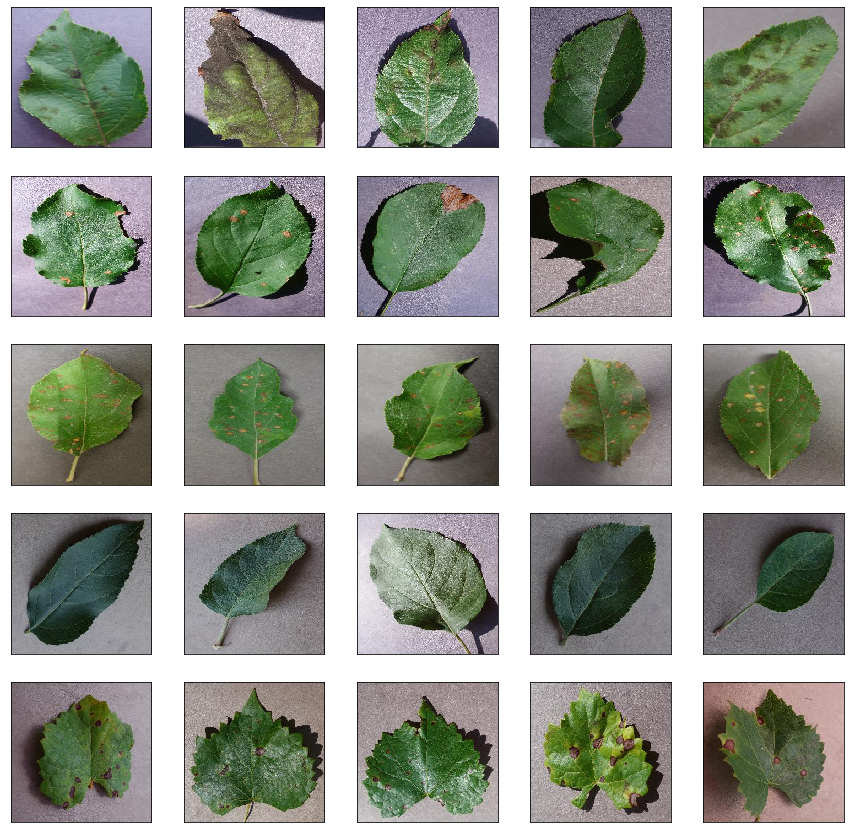

In [16]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
%matplotlib inline

BASE_DIR = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train' 
#CSV_PATH = BASE_DIR + '/train.csv' 
#IMAGE_DIR = BASE_DIR + '/images'

files = [[path+f for f in os.listdir(path)[:5]] for path in [f'/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/{x}/' for x in ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy','Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']]]

fig, axs = plt.subplots(5, 5, figsize=(15,15), subplot_kw={'xticks': [], 'yticks': []})

for ax, img in zip(axs.flatten(), [item for sublist in files for item in sublist]):
    ax.imshow(load_img(img))
    #ax.set_title(img.split('/')[-1])

In [0]:
train_dir = os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train')
val_dir = os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir/test')
test_dir = os.path.join('/content/drive/My Drive/Dataset/plantdisease-tugasakhir/test')

In [18]:
image_size = 224 # Semua gambar diubah kedalam 224 * 224
batch_size = 110

# ubah semua kode gambar dari 0-255 menjadi 0-1 (berfungsi untuk standarisasi dari data)
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255,
                # featurewise_center=True,
                # featurewise_std_normalization=True,
                # rotation_range=20,
                # width_shift_range=0.2,
                # height_shift_range=0.2,
                # horizontal_flip=True)
             
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)

# Generate data gambar menjadi array
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='sparse')

validation_generator = validation_datagen.flow_from_directory(
                val_dir, 
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='sparse')


test_generator = test_datagen.flow_from_directory(
                test_dir, 
                target_size=(image_size, image_size),
                batch_size=batch_size,
                shuffle=False, #mempermudah saat nanti klasifikasi mengunakan sklearn
                class_mode='sparse')

Found 7510 images belonging to 11 classes.
Found 1875 images belonging to 11 classes.
Found 1875 images belonging to 11 classes.


In [0]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
%matplotlib inline

img_samples = 16
BASE_DIR = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train' 
#CSV_PATH = BASE_DIR + '/train.csv' 
#IMAGE_DIR = BASE_DIR + '/images'

image_dir = '/content/preview/'
if not os.path.exists(image_dir):
    os.makedirs(image_dir)

img = load_img('/content/drive/My Drive/Dataset/plantdisease-tugasakhir/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

from itertools import islice
list(islice(train_datagen.flow(x, batch_size=1, save_to_dir='/content/preview', save_prefix='cat', save_format='jpg'), img_samples));

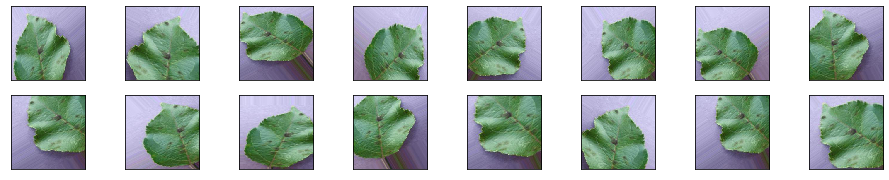

In [20]:
rows, cols = 2, img_samples // 2
fig, axs = plt.subplots(rows, cols, figsize=(16,3), subplot_kw={'xticks': [], 'yticks': []})

#for i, img in enumerate(os.listdir(image_dir)[:img_samples]):
#    axs[i//cols][i%cols].imshow(load_img(image_dir+img))

for ax, img in zip(axs.flatten(), os.listdir('/content/preview')[:img_samples]):
    ax.imshow(load_img('/content/preview/'+img))

In [0]:
from keras.applications.resnet50 import ResNet50

resnet_weights_path = '/content/drive/My Drive/Dataset/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [30]:
resnet_model = tf.keras.applications.resnet50(weights=resnet_weights_path, input_shape = (224,224,3), include_top=False)

TypeError: ignored